<a href="https://colab.research.google.com/github/dclark18/MSDS_Capstone/blob/master/Capstone_A_EDA_Clark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from io import StringIO

%matplotlib inline

import numpy as np
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

#from pathos.multiprocessing import ProcessingPool as Pool
import pandas.util.testing as tm
import multiprocessing as mp

In [2]:
female_drive = 'https://drive.google.com/file/d/17fVhjvXH-ckfQM1kY_4CrQH2UDlszY-L/view?usp=sharing'

file_id = female_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
female_clean = pd.read_csv(csv_raw)
female_clean.head()
female_clean = female_clean.iloc[0:22990]
female_clean.tail()

/Users/danielclark/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0     FID   Id  Bear_ID  SAMPLEID   TURNANGLE   STEPLENGTH  \
22985     22986.0  4681.0  0.0    375.0    4681.0  -56.424118   234.498194   
22986     22987.0  4682.0  0.0    375.0    4682.0  179.173599   515.164005   
22987     22988.0  4683.0  0.0    375.0    4683.0  -14.217464  3473.900916   
22988     22989.0  4684.0  0.0    375.0    4684.0  106.585696   440.587103   
22989     22990.0  4685.0  0.0    375.0    4685.0  148.551590   240.630812   

          BEARING  OBSERVED        datetime  ...  naturalMAX naturalBEG  \
22985  318.328368       0.0  8/30/2012 0:00  ...         1.0        1.0   
22986  193.926086       0.0  8/30/2012 0:00  ...         1.0        1.0   
22987    0.535023       0.0  8/30/2012 0:00  ...         1.0        1.0   
22988  121.338182       0.0  8/30/2012 0:00  ...         1.0        1.0   
22989  163.304076       0.0  8/30/2012 0:00  ...         1.0        1.0   

       naturalEND   NatnegLWM  NatnegMIN   NatnegMAX  NatnegBEG   NatnegEND  \
22985         1.0   46.071839 -30.000000   84.852814      -30.0  -30.000000   
22986         0.0  -31.332584 -67.082039   42.426407      -30.0   42.426407   
22987         0.0  236.653002 -90.000000  600.000000      -30.0  600.000000   
22988         0.0  128.143142 -42.426407  212.132034      -30.0  189.736664   
22989         0.0    4.970611 -30.000000   90.000000      -30.0   90.000000   

       STRATUM     resid  
22985   2090.0 -0.640189  
22986   2090.0 -0.444709  
22987   2090.0 -0.017580  
22988   2090.0 -0.114555  
22989   2090.0 -0.290843  

[5 rows x 69 columns]

In [3]:
male_drive = 'https://drive.google.com/file/d/1rNNRoeG6_SUXe1gHYK7kwg5lKYyunQrb/view?usp=sharing'

file_id = male_drive.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
male_clean = pd.read_csv(csv_raw)
male_clean = male_clean.iloc[0:167057]
male_clean.head()
male_clean.tail()

/Users/danielclark/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0     FID   Id  Bear_ID  SAMPLEID   TURNANGLE   STEPLENGTH  \
167052    167053.0  6771.0  0.0    831.0    6771.0  -77.339746   457.878450   
167053    167054.0  6772.0  0.0    831.0    6772.0   33.112707  1513.832435   
167054    167055.0  6773.0  0.0    831.0    6773.0  -37.634686   496.507613   
167055    167056.0  6774.0  0.0    831.0    6774.0  -18.001250   341.453471   
167056    167057.0  6775.0  0.0    831.0    6775.0 -144.759947   588.596818   

           BEARING  OBSERVED         datetime  ...  naturalMAX naturalBEG  \
167052  166.201538       0.0  8/30/2012 12:02  ...         1.0        1.0   
167053  276.653991       0.0  8/30/2012 12:02  ...         1.0        1.0   
167054  205.906598       0.0  8/30/2012 12:02  ...         1.0        1.0   
167055  225.540034       0.0  8/30/2012 12:02  ...         1.0        1.0   
167056   98.781337       0.0  8/30/2012 12:02  ...         1.0        1.0   

        naturalEND   NatnegLWM  NatnegMIN   NatnegMAX  NatnegBEG   NatnegEND  \
167052         0.0  124.493927 -42.426407  212.132034 -42.426407  150.000000   
167053         0.0   -6.867719 -84.852814   67.082039 -42.426407   42.426407   
167054         0.0  132.056153 -42.426407  305.941162 -42.426407  276.586334   
167055         0.0   29.996062 -60.000000  174.928558 -42.426407  174.928558   
167056         0.0   -9.358880 -60.000000   42.426407 -42.426407   30.000000   

        STRATUM     resid  
167052  15187.0 -0.312966  
167053  15187.0 -0.483855  
167054  15187.0 -0.208582  
167055  15187.0 -0.291362  
167056  15187.0 -0.489409  

[5 rows x 69 columns]

## Data

In [4]:
print('Female Records and fields', female_clean.shape)
print('Male Records and fields', male_clean.shape)

print("Total Missing Values - Female", female_clean.isnull().sum().sum())
print('Total Missing Values - Male', male_clean.isnull().sum().sum())

Female Records and fields (22990, 69)
Male Records and fields (167057, 69)
Total Missing Values - Female 0
Total Missing Values - Male 0


## EDA

#### Response Variable

Text(0, 0.5, 'Count')

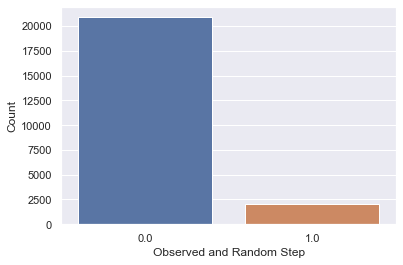

In [5]:
ax = sns.countplot(x = 'OBSERVED', data = female_clean)
ax.set_xlabel("Observed and Random Step")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

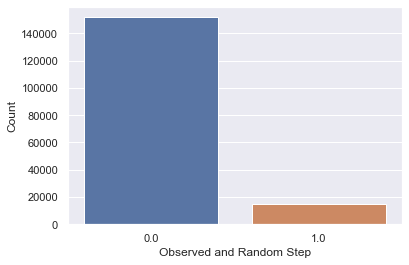

In [6]:
ax = sns.countplot(x = 'OBSERVED', data = male_clean)
ax.set_xlabel("Observed and Random Step")
ax.set_ylabel("Count")

Looking at the female vs male data and the observed value vs random state value, we are seeing that for every observed value, we will get 10 random values to test against. 

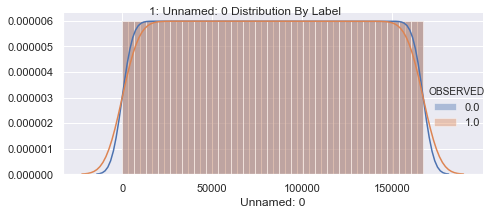

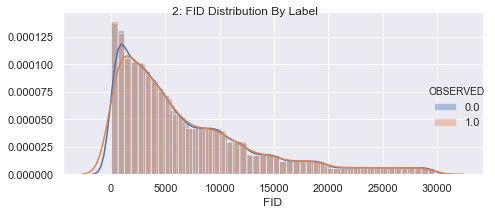

/Users/danielclark/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/danielclark/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


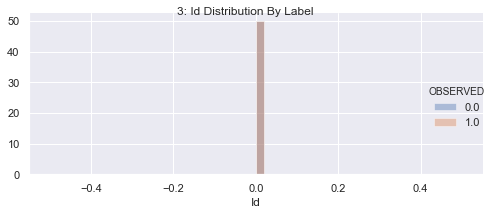

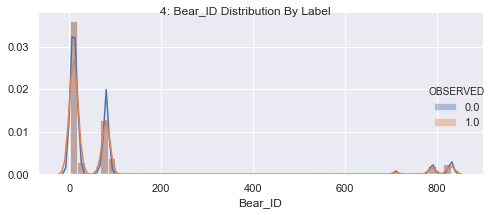

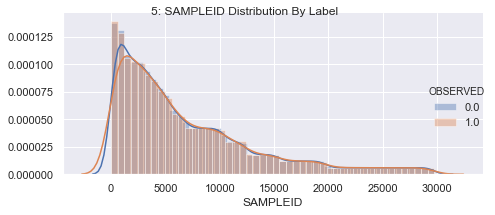

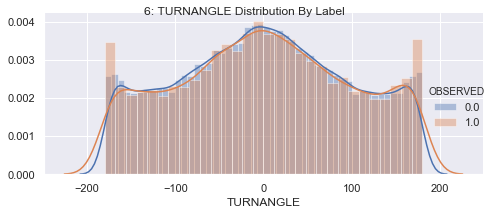

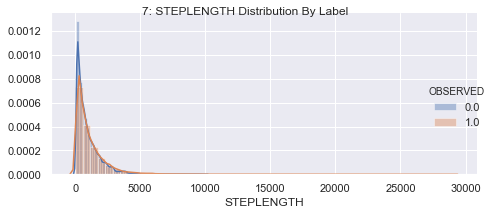

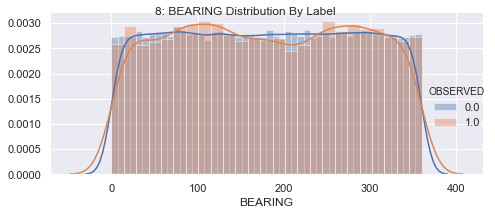

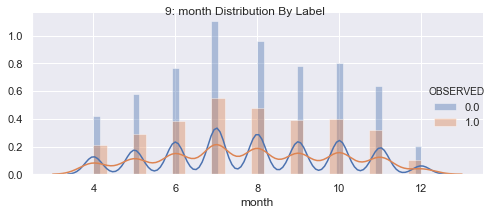

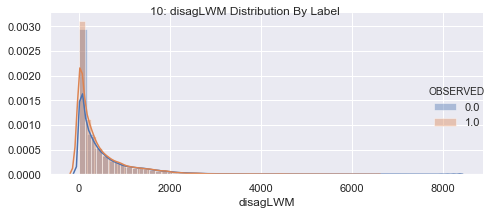

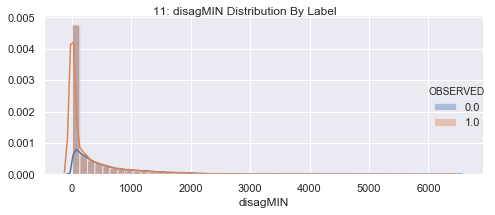

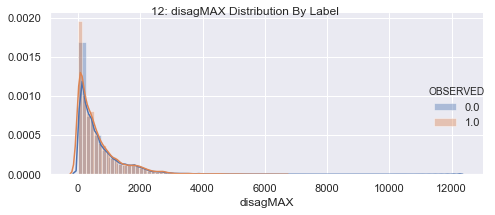

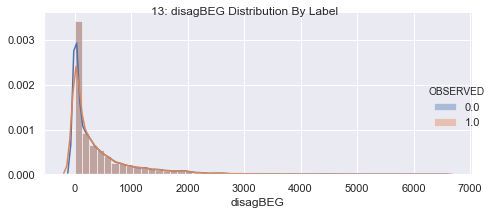

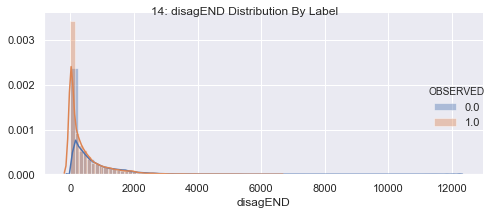

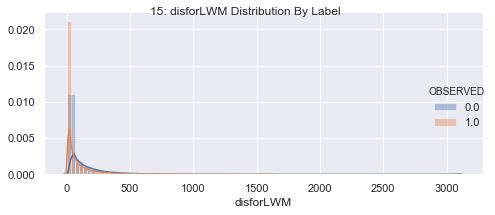

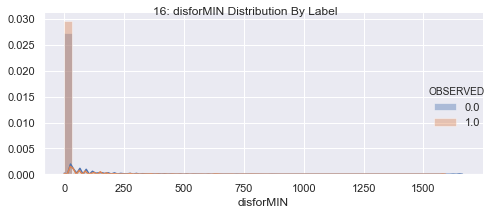

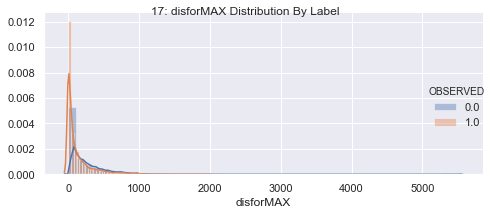

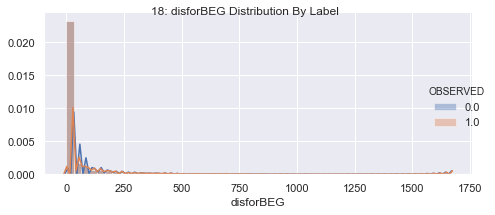

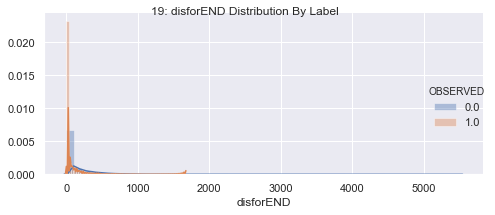

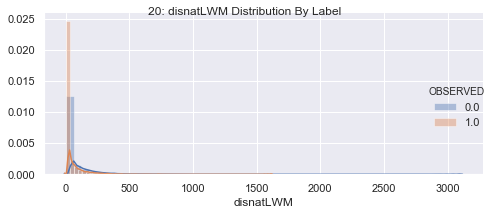

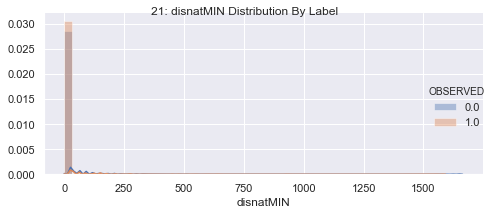

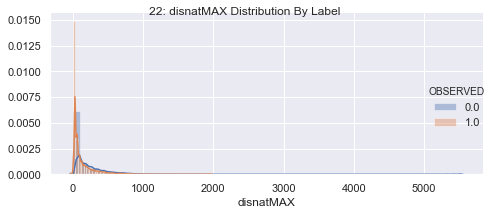

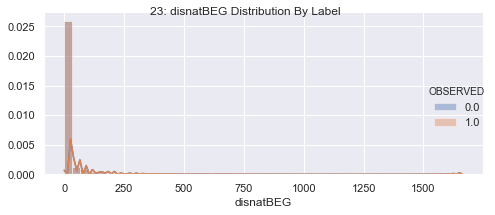

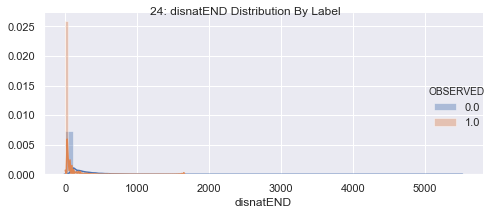

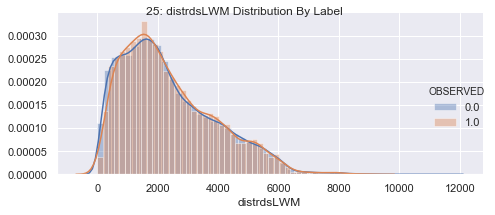

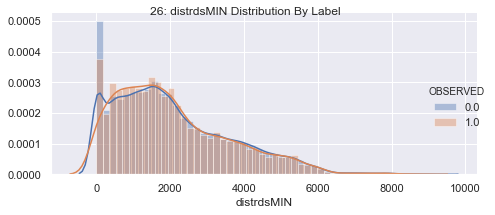

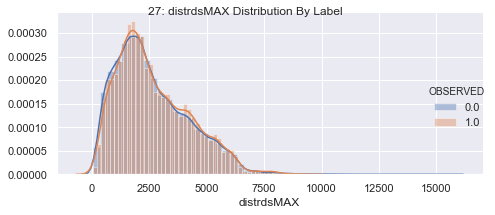

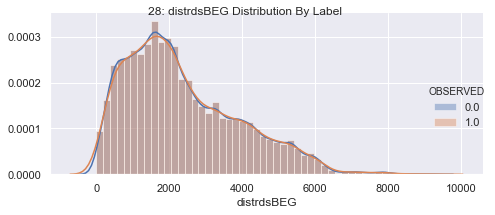

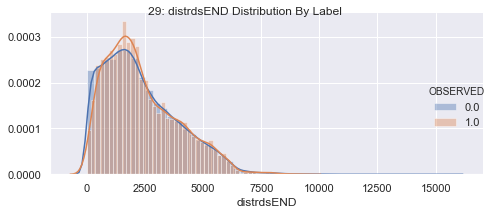

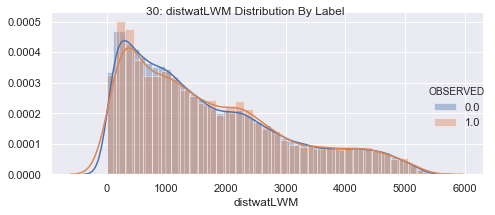

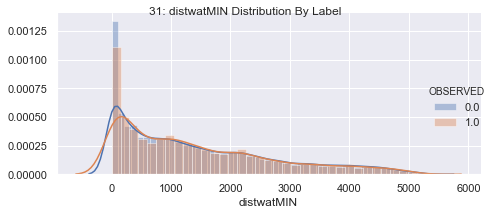

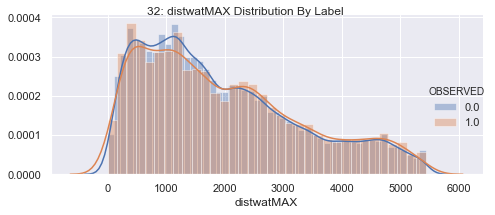

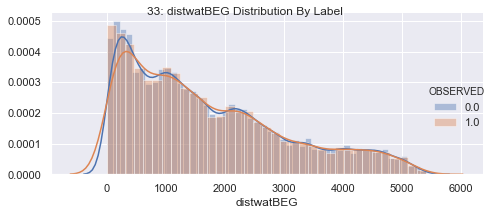

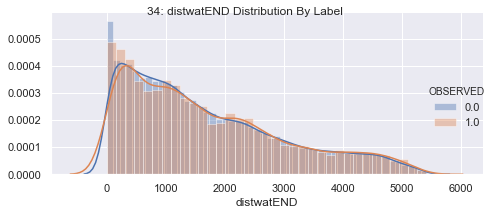

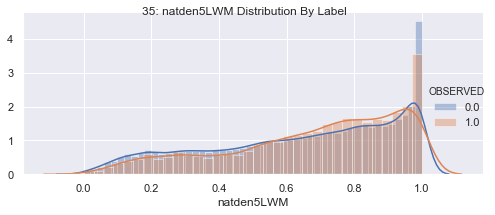

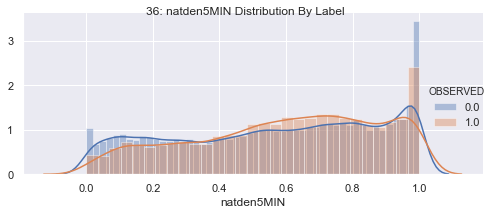

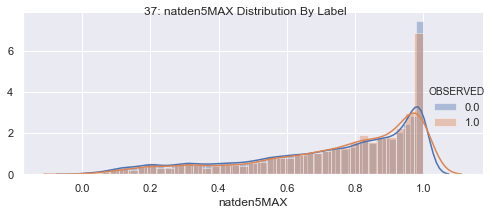

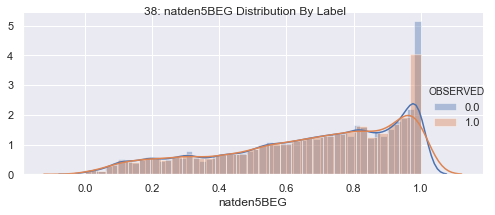

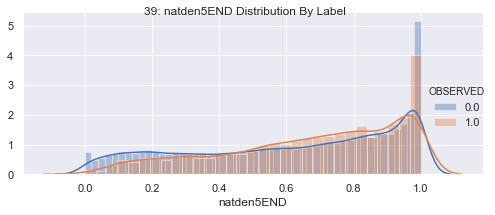

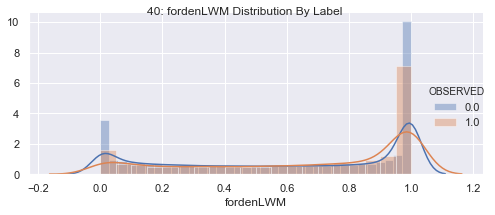

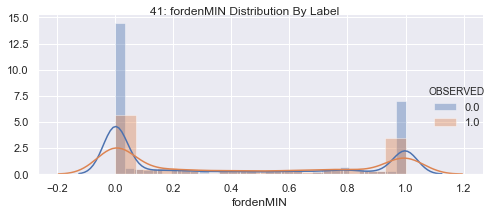

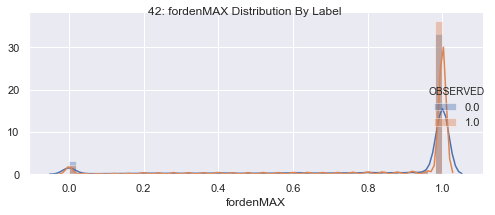

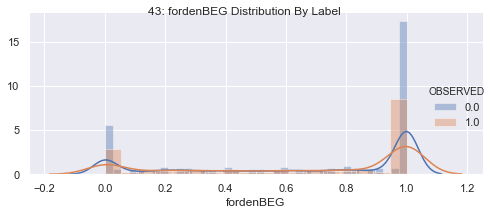

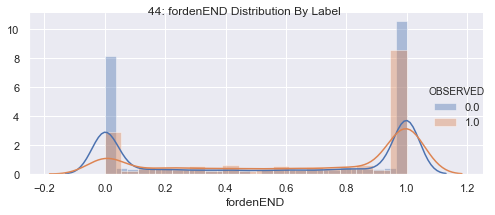

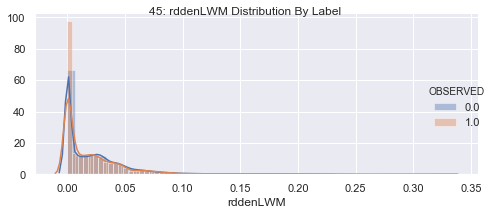

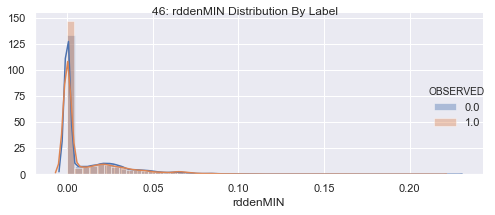

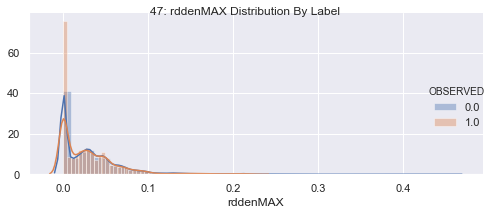

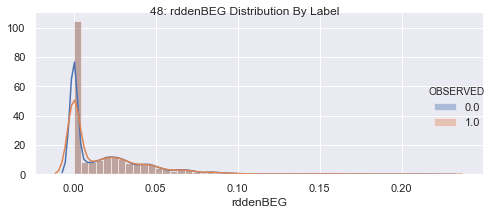

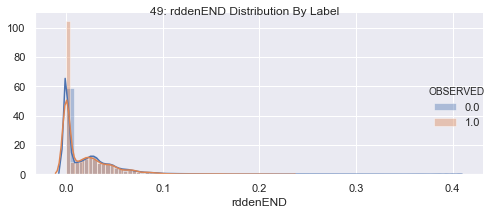

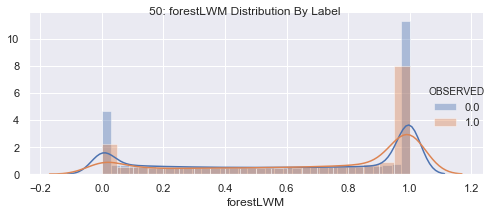

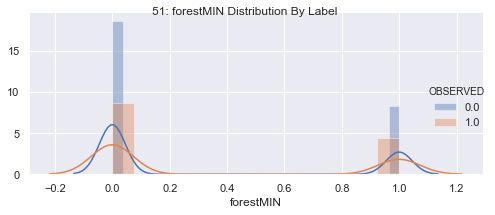

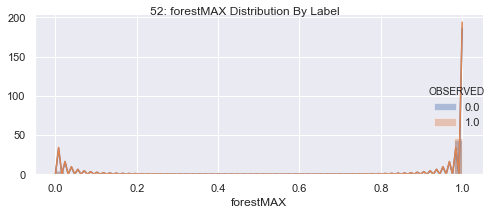

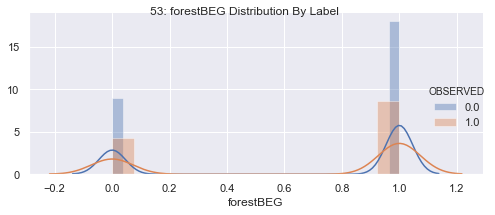

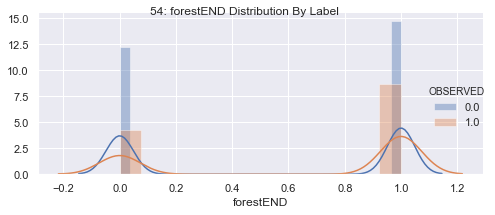

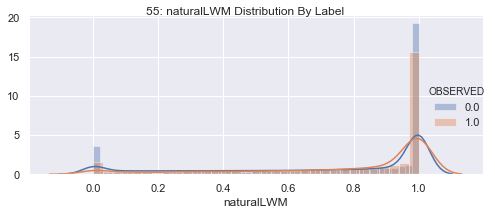

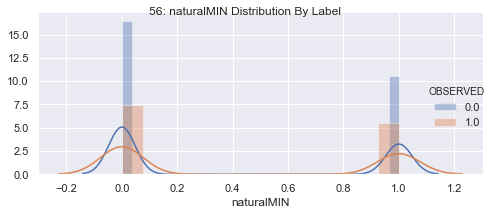

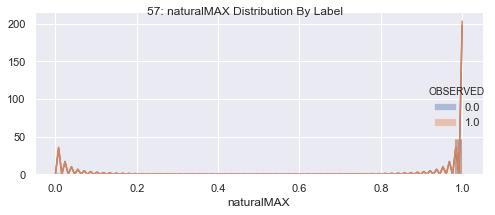

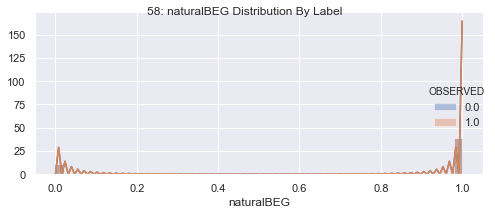

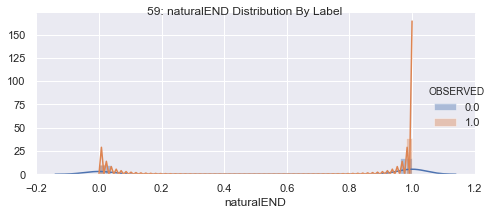

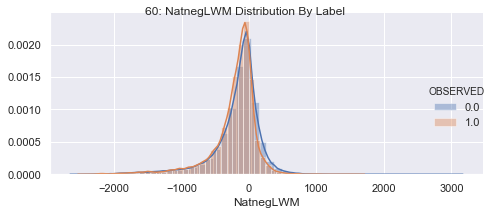

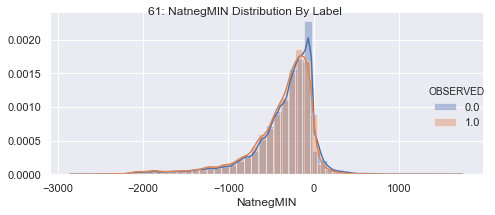

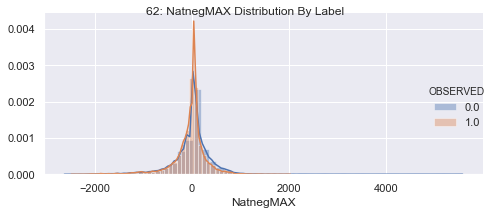

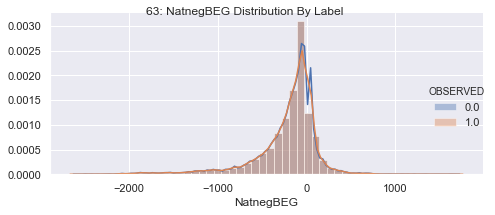

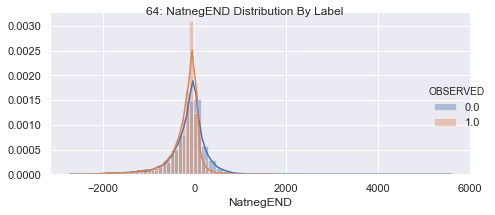

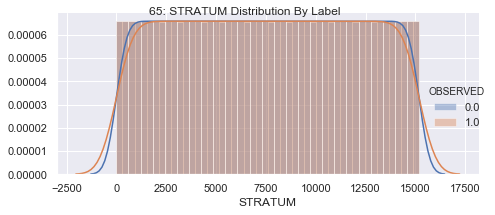

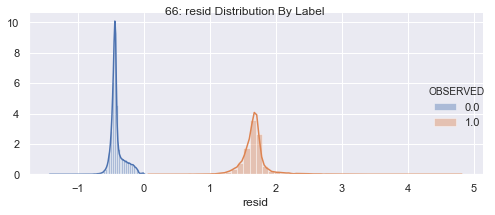

In [7]:

plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(5,5)
colnames=list(male_clean.drop(['OBSERVED'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    facet = sns.FacetGrid(male_clean, hue='OBSERVED',aspect=2)
    facet.map(sns.distplot,i)
    facet.add_legend()
    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
    plt.tight_layout()
    plt.show()

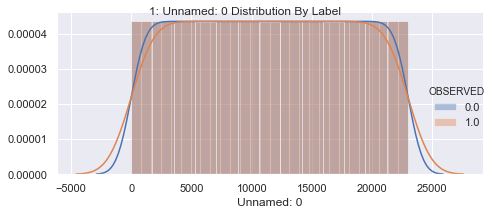

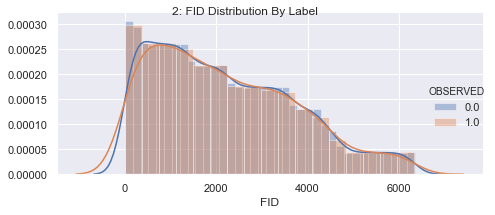

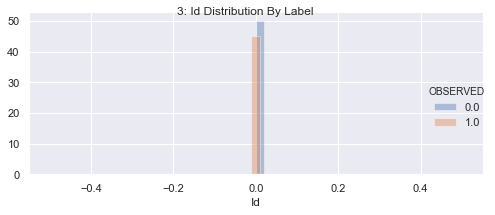

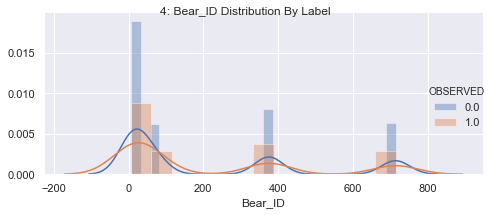

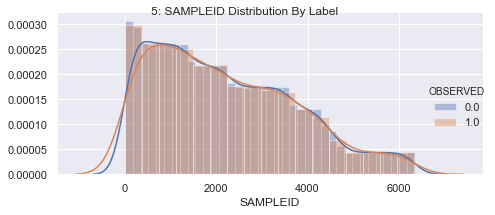

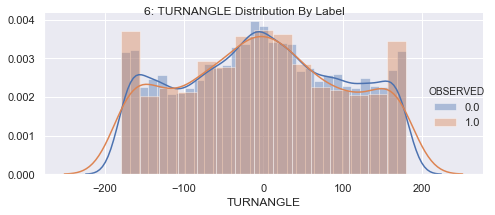

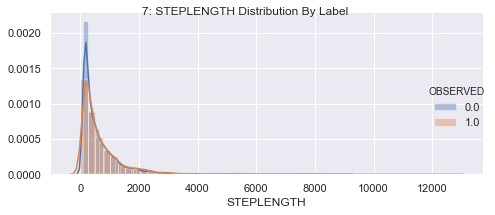

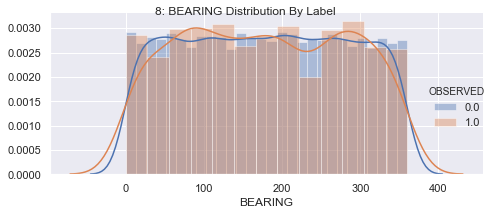

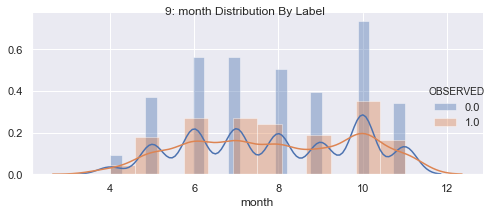

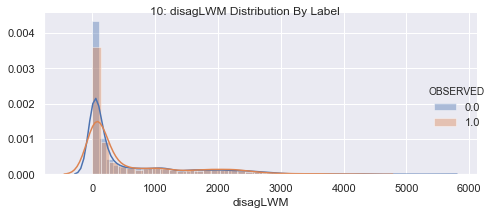

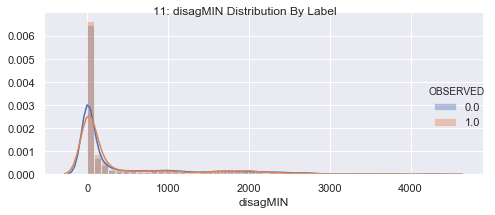

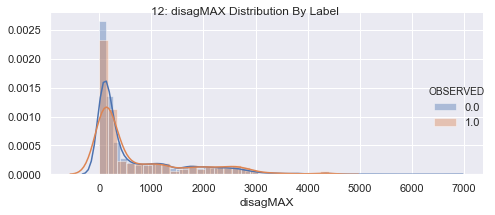

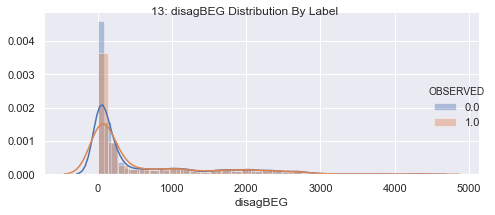

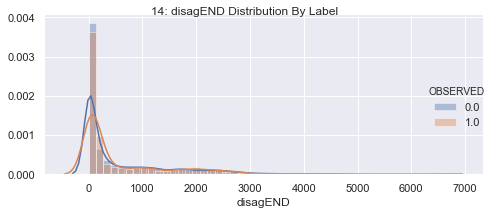

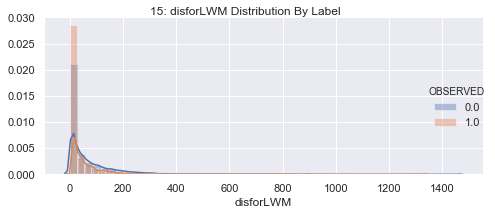

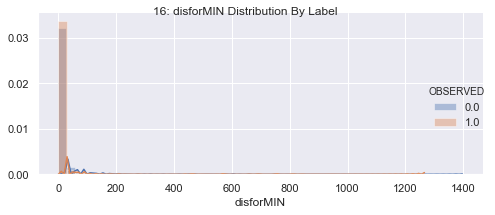

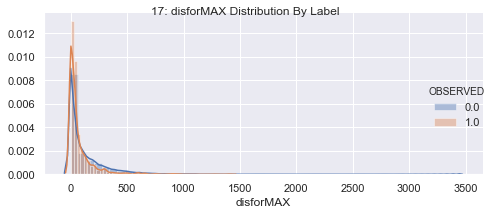

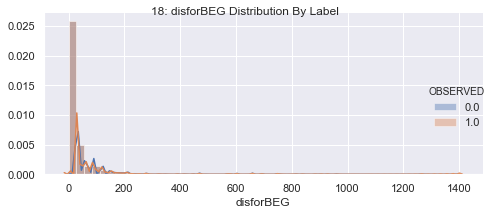

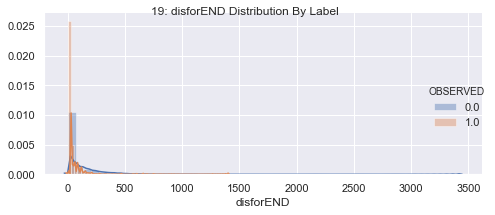

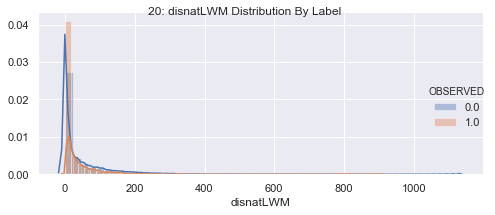

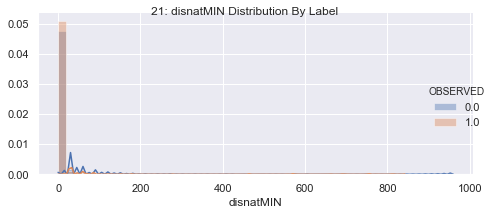

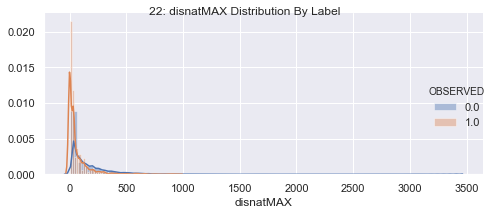

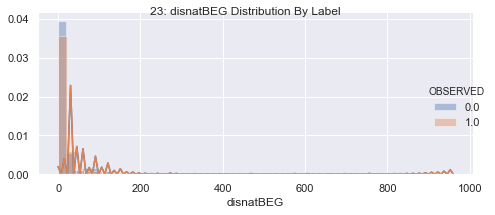

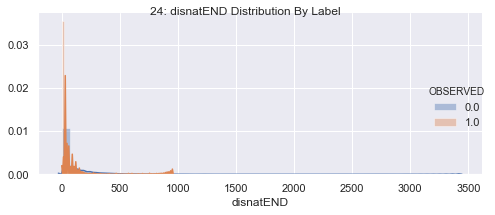

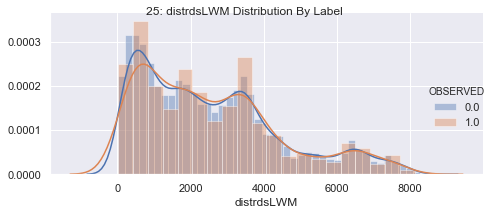

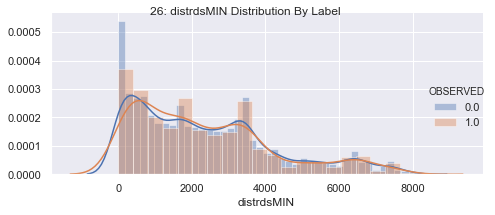

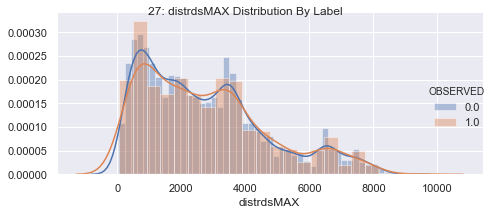

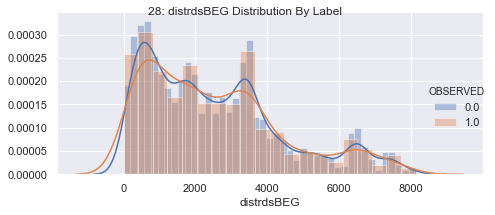

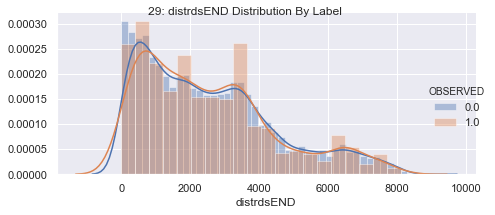

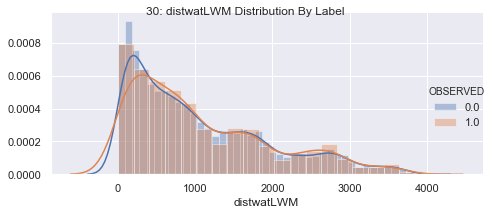

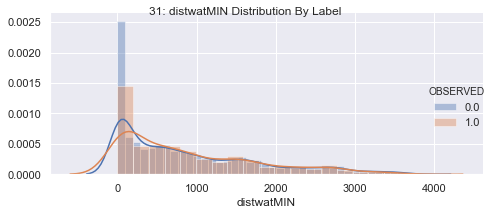

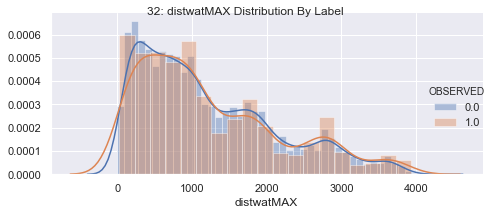

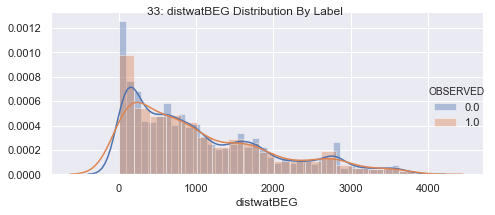

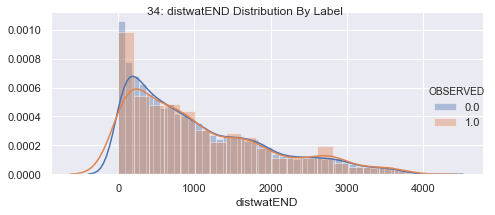

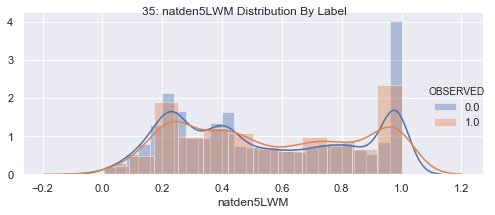

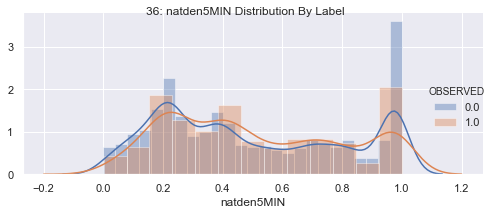

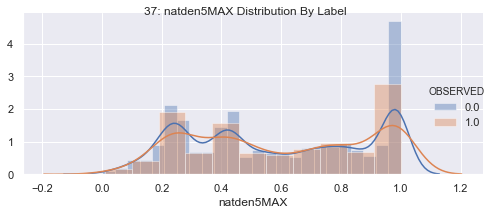

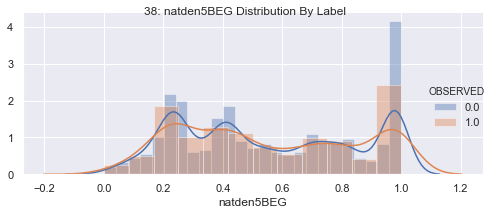

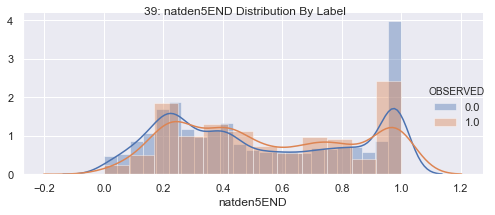

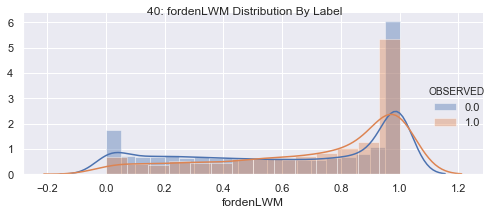

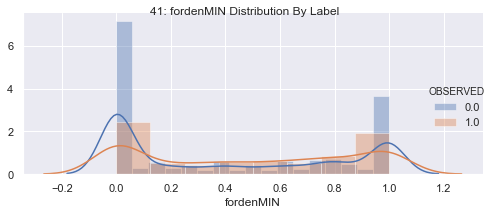

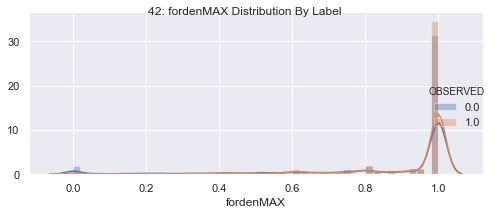

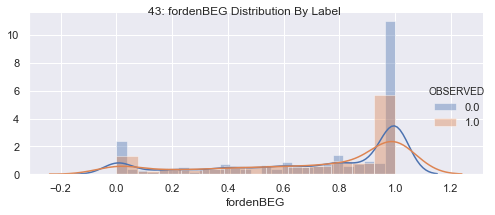

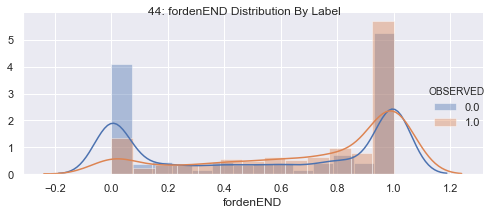

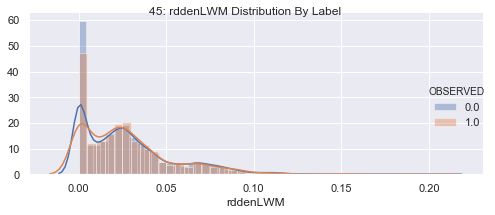

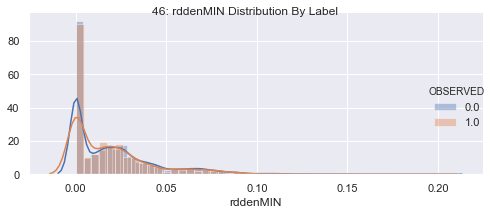

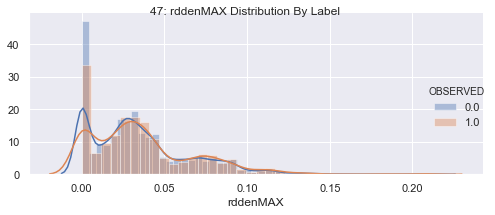

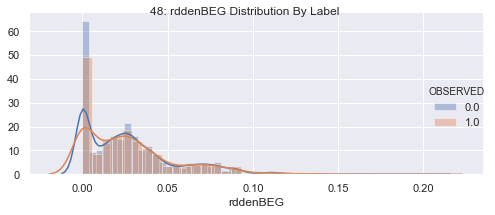

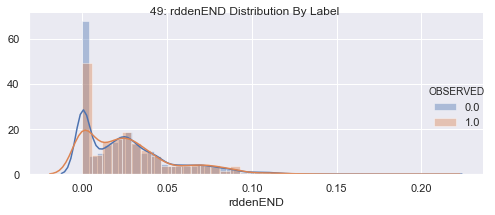

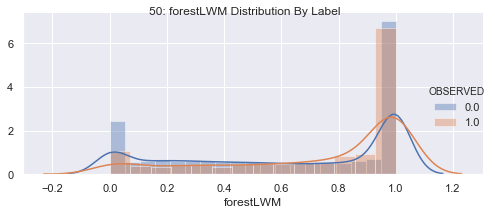

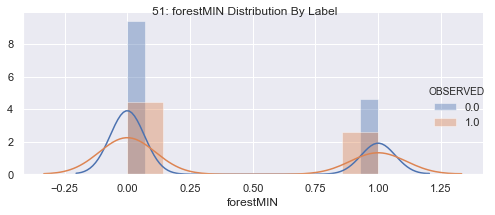

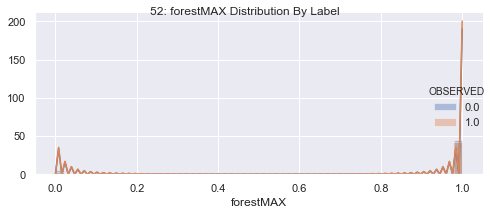

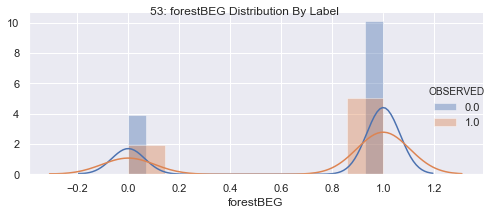

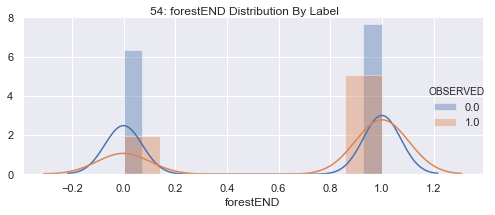

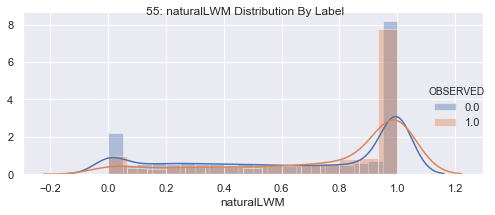

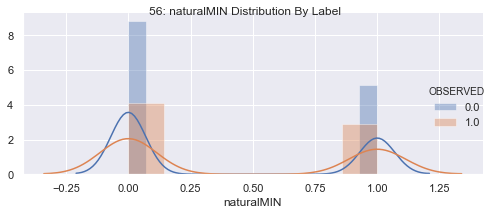

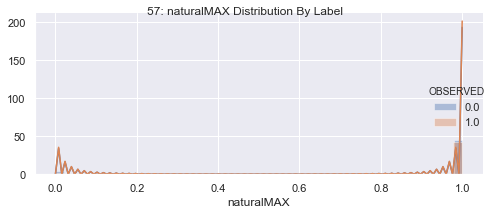

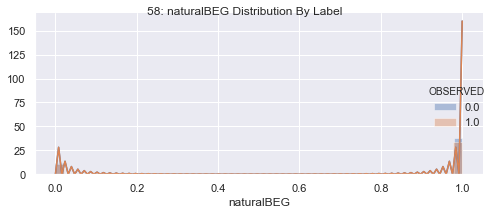

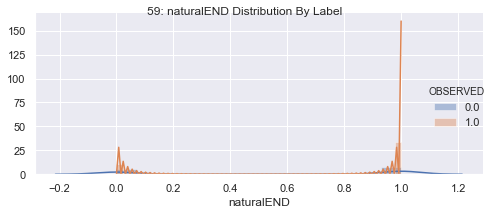

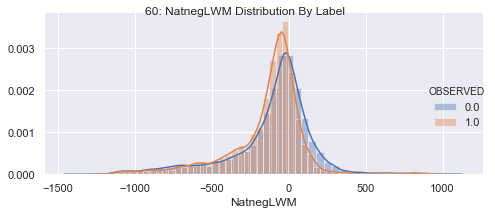

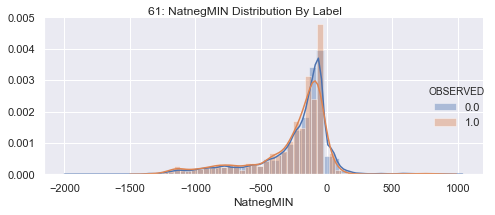

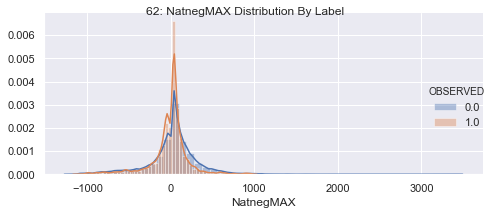

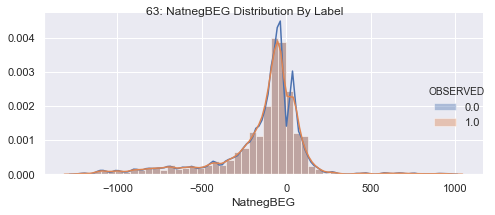

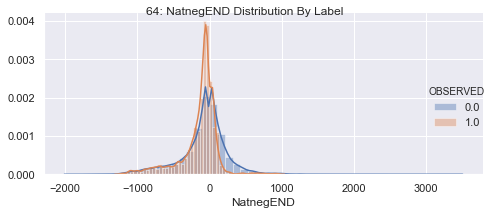

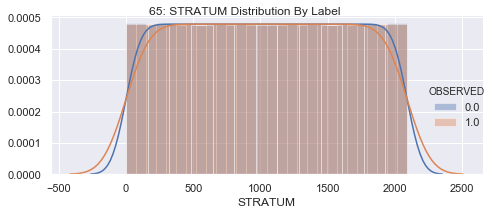

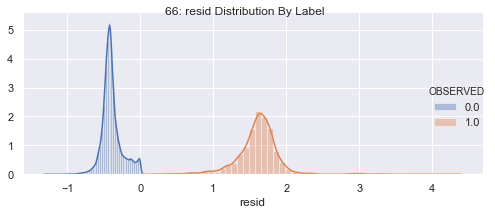

In [8]:
plt.rcParams['figure.max_open_warning']=40
plt.rcParams['figure.figsize']=(5,5)
colnames=list(female_clean.drop(['OBSERVED'], axis=1).select_dtypes(exclude='O').columns.values)
for i in colnames[0:]:
    facet = sns.FacetGrid(female_clean, hue='OBSERVED',aspect=2)
    facet.map(sns.distplot,i)
    facet.add_legend()
    facet.fig.suptitle(''.join(map(str, list([colnames.index(i)+1,": ",i," Distribution By Label"]))))
    plt.tight_layout()
    plt.show()

Looking at both male and female data and the distribution of continuous values, we can see that generally there are no glaring differences between the distribution of observed values vs random values outside of the residual data. So for our model, we wouuld likely want to remove residual as it might be overly indicative of performance. 

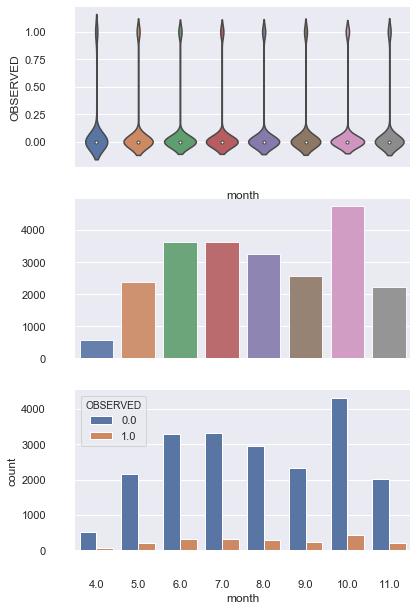

In [9]:
count = female_clean['month'].value_counts()
f, axes = plt.subplots(3, 1, figsize=(6, 10), sharex=True)
sns.barplot(count.index, count.values, alpha=0.9, ax=axes[1])
sns.violinplot(x="month", y="OBSERVED", data=female_clean, ax=axes[0])
sns.countplot(x = 'month', data = female_clean, hue = 'OBSERVED', ax=axes[2])
sns.despine(offset=20, trim=True)

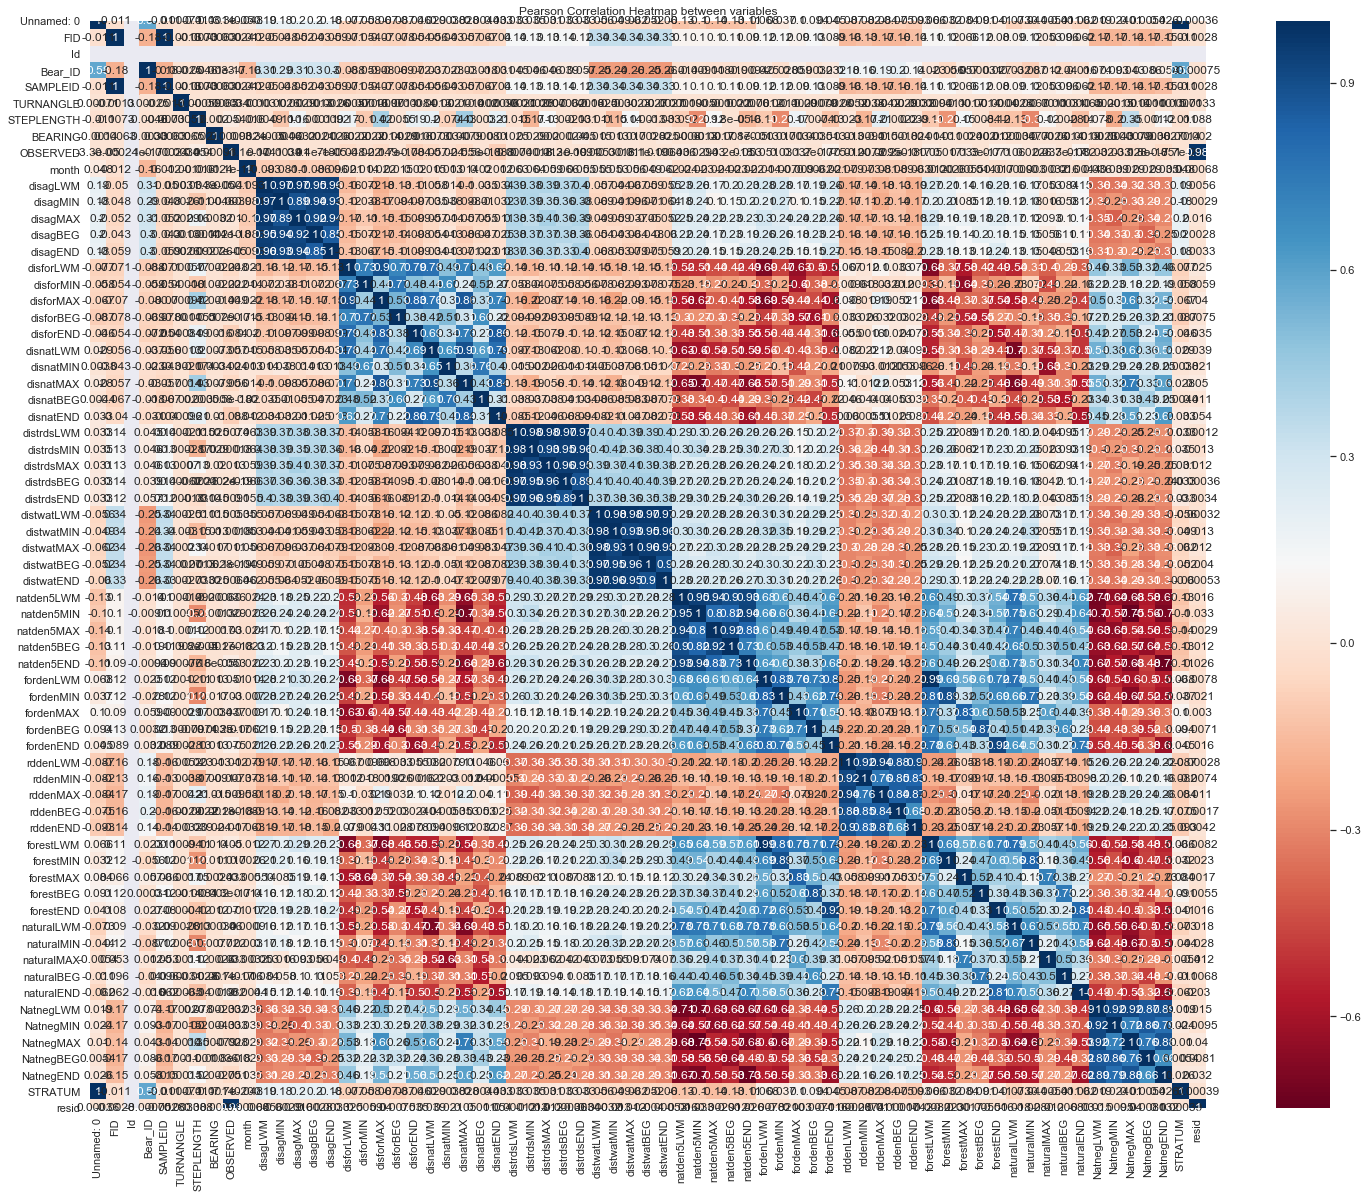

In [10]:
ax, fig = plt.subplots(figsize = (25,20))
sns.set(font_scale=1)
sns.heatmap(male_clean.corr(), annot=True, cmap = 'RdBu') 
plt.title("Pearson Correlation Heatmap between variables")
plt.show()

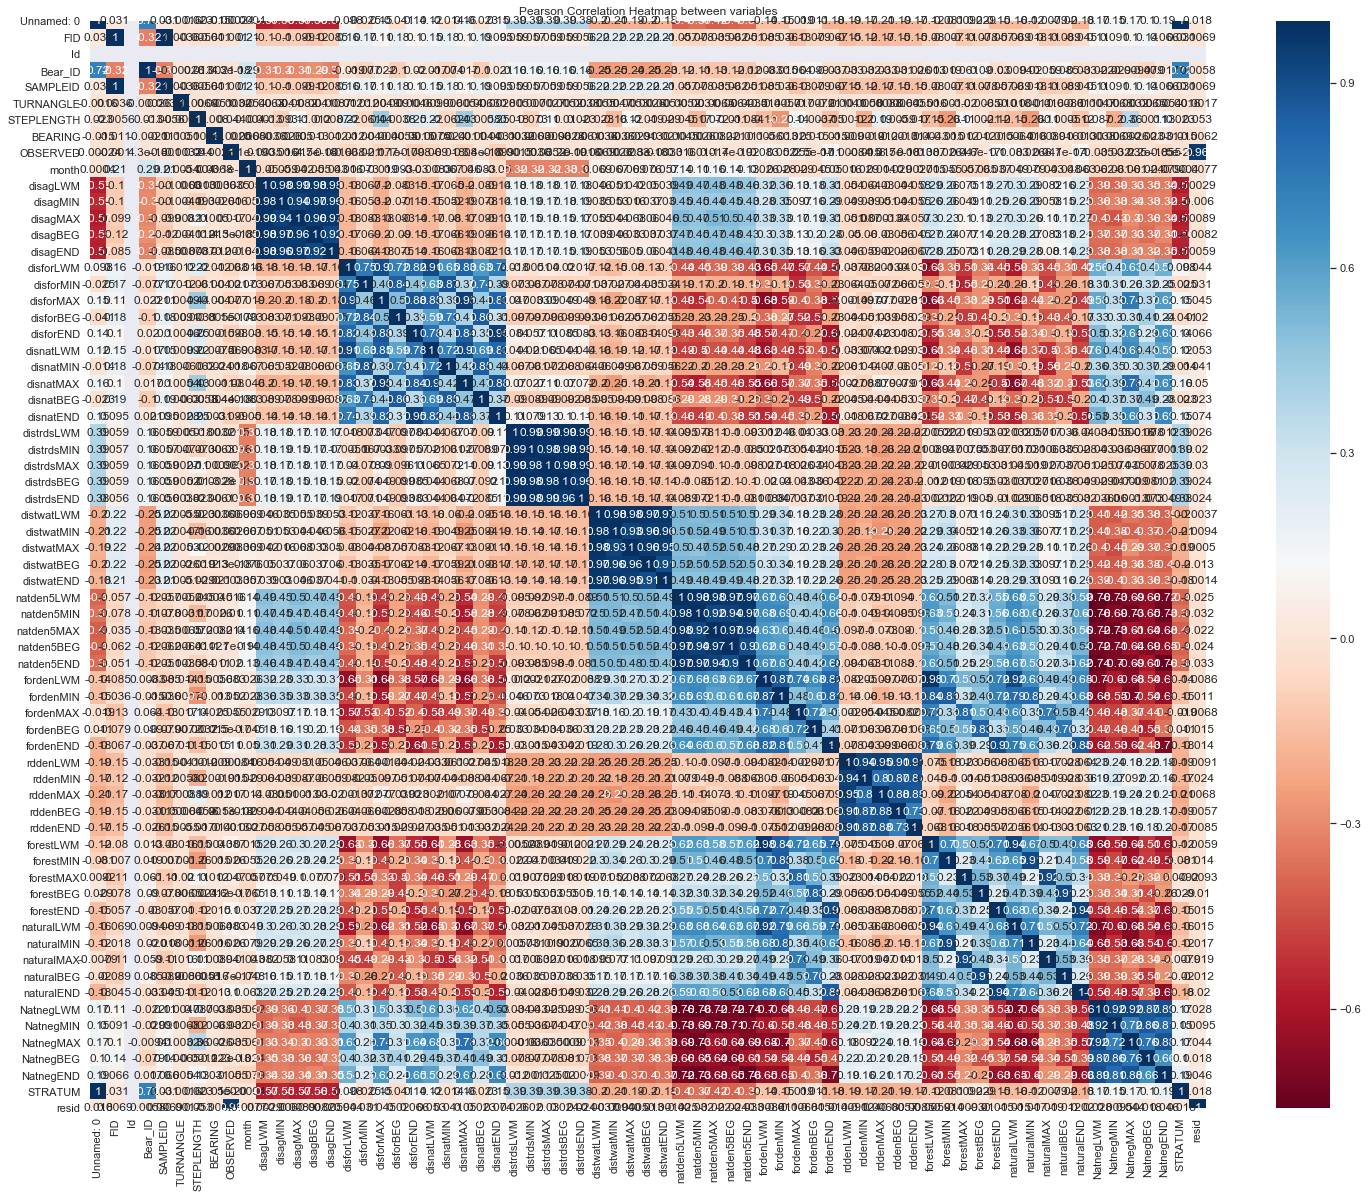

In [11]:

ax, fig = plt.subplots(figsize = (25,20))
sns.set(font_scale=1)
sns.heatmap(female_clean.corr(), annot=True, cmap = 'RdBu') 
plt.title("Pearson Correlation Heatmap between variables")
plt.show()

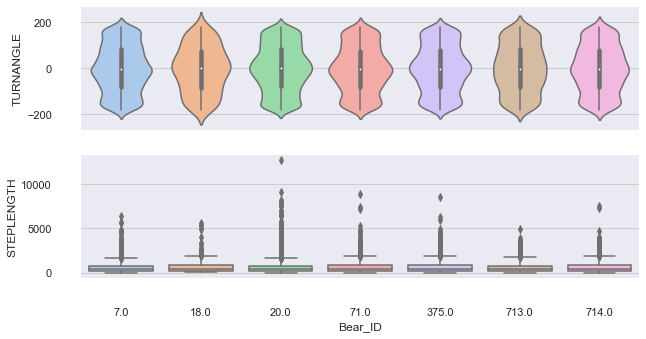

In [12]:

f, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Bear_ID", y="STEPLENGTH", data=female_clean, ax=axes[1])
sns.violinplot(x="Bear_ID", y="TURNANGLE", data=female_clean, ax=axes[0])
sns.despine(offset=20, trim=True)

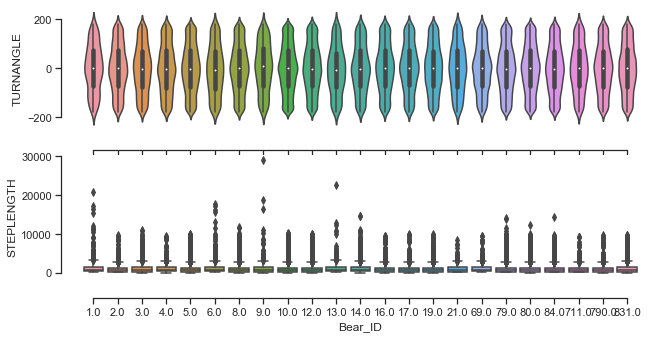

In [13]:
f, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Bear_ID", y="STEPLENGTH", data=male_clean, ax=axes[1])
sns.violinplot(x="Bear_ID", y="TURNANGLE", data=male_clean, ax=axes[0])
sns.despine(offset=20, trim=True)

## Baseline Classifier

In [14]:

%matplotlib inline

import numpy as np
import pandas as pd
#import modin.pandas as pd
import matplotlib.pyplot as plt

#import cufflinks as cf
#cf.go_offline()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()

from pathos.multiprocessing import ProcessingPool as Pool
import multiprocessing as mp

### Goal 

Given the male and female bear dataset. Predict the response "OBSERVED" using the feature set consisting of the location and GPS coordinates data. Identify the optmized model and feature set that maximizes the accuracy and minimizes cost given the following constraints. 



In [15]:
male_clean.head()

Unnamed: 0  FID   Id  Bear_ID  SAMPLEID  TURNANGLE   STEPLENGTH  \
0         1.0  0.0  0.0      1.0       0.0 -30.452138  1517.096556   
1         2.0  1.0  0.0      1.0       1.0  86.333287   129.714618   
2         3.0  2.0  0.0      1.0       2.0  64.160478   202.879209   
3         4.0  3.0  0.0      1.0       3.0  76.329050   592.086980   
4         5.0  4.0  0.0      1.0       4.0  95.750746   488.597687   

      BEARING  OBSERVED         datetime  ...  naturalMAX naturalBEG  \
0  206.512289       1.0  5/14/2010 20:50  ...         1.0        1.0   
1  323.297713       0.0  5/14/2010 20:50  ...         1.0        1.0   
2  301.124905       0.0  5/14/2010 20:50  ...         1.0        1.0   
3  313.293477       0.0  5/14/2010 20:50  ...         1.0        1.0   
4  332.715173       0.0  5/14/2010 20:50  ...         1.0        1.0   

   naturalEND    NatnegLWM    NatnegMIN  NatnegMAX  NatnegBEG    NatnegEND  \
0         1.0  -532.332639 -1094.897217       30.0    -1050.0  -123.693169   
1         1.0 -1094.048479 -1140.394653    -1050.0    -1050.0 -1140.394653   
2         1.0 -1142.342003 -1230.365845    -1050.0    -1050.0 -1230.365845   
3         1.0 -1279.810606 -1500.299927    -1050.0    -1050.0 -1471.223999   
4         1.0 -1182.258755 -1339.290894    -1050.0    -1050.0 -1339.290894   

   STRATUM     resid  
0      1.0  1.618859  
1      1.0 -0.432693  
2      1.0 -0.431176  
3      1.0 -0.411518  
4      1.0 -0.413950  

[5 rows x 69 columns]

In [16]:
#create a holdout set
from sklearn.model_selection import train_test_split
male_clean_x, unseen_x_test, male_clean_y, unseen_y_test = train_test_split(male_clean.loc[:, male_clean.columns != 'OBSERVED'], male_clean['OBSERVED'], test_size=0.30, stratify=male_clean['STRATUM'],random_state=42)

To begin our prediction modeling, we will create a train / test split on the X and Y variables using a 70/30 ratio between training and testing. Since we have an offbalanced Y variable, we will use stratified sampling of our OBSERVED values using STRATUM to make sure we have a significant amount of observations in each binary to best ensure our classifier is fair.

In [17]:
print(unseen_x_test.shape)
print(unseen_y_test.shape)

male_clean_x.reset_index(drop=True, inplace=True)
unseen_x_test.reset_index(drop=True, inplace=True)
male_clean_y.reset_index(drop=True, inplace=True)
unseen_y_test.reset_index(drop=True, inplace=True)

(50118, 68)
(50118,)



Now that we divided up our train and test split, we can see that our testing set has over 50,000 observations. While, as we know, the x dataframe will have 68 columns.

In [18]:

##TRAIN
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = male_clean_x.loc[:, male_clean_x.dtypes == 'float64'].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = male_clean_x.loc[:, male_clean_x.dtypes == 'float64'].columns
unscaled = pd.concat([male_clean_x, male_clean_y], axis=1)

##HOLDOUT
#scale the test data seperately from the unseen holdout set
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

x = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
x = imp.fit_transform(x)
x = pd.DataFrame(x)
x.columns = unseen_x_test.loc[:, unseen_x_test.dtypes == 'float64'].columns
x = pd.DataFrame(x)
unseen_x = pd.concat([unseen_x_test, unseen_y_test], axis=1)

In [19]:
unscaled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116939 entries, 0 to 116938
Data columns (total 69 columns):
Unnamed: 0    116939 non-null float64
FID           116939 non-null float64
Id            116939 non-null float64
Bear_ID       116939 non-null float64
SAMPLEID      116939 non-null float64
TURNANGLE     116939 non-null float64
STEPLENGTH    116939 non-null float64
BEARING       116939 non-null float64
datetime      116939 non-null object
month         116939 non-null float64
CLUSTER       116939 non-null object
disagLWM      116939 non-null float64
disagMIN      116939 non-null float64
disagMAX      116939 non-null float64
disagBEG      116939 non-null float64
disagEND      116939 non-null float64
disforLWM     116939 non-null float64
disforMIN     116939 non-null float64
disforMAX     116939 non-null float64
disforBEG     116939 non-null float64
disforEND     116939 non-null float64
disnatLWM     116939 non-null float64
disnatMIN     116939 non-null float64
disnatMAX     116

Now that we applied our cleaning data to our x data frame, we see that we have nearly 116k observations



In [ ]:

from pycaret.classification import *
#intialize the setup

exp_clf = setup(unscaled
                ,target = 'OBSERVED'
                ,train_size = 0.7
                ,profile = False
                ,remove_multicollinearity = True
                ,polynomial_features = False
                ,feature_interaction = True
                ,feature_ratio = False
                ,feature_selection = True
                #,fix_imbalance = True
                ,silent=True
                #,cluster = True
                ,pca = False
                ,numeric_imputation = 'mean'
                ,normalize=True
                ,categorical_features = ['datetime', 'CLUSTER']
                #,n_jobs=32
               )

IntProgress(value=0, description='Processing: ', max=13)

Initiated  . . . . . . . . . . . . . . . . . .                     00:00:15
Status     . . . . . . . . . . . . . . . . . .  Preparing Data for Modeling
ETC        . . . . . . . . . . . . . . . . . .              Calculating ETC

In [ ]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5)

In [ ]:
catboost = create_model(estimator = 'catboost', ensemble = True, method='Bagging')

In [ ]:
# select best model 
best = automl(optimize = 'MCC')

In [ ]:
plot_model(best)
